##We covered a lot of information today and I'd like you to practice developing classification trees on your own. For each exercise, work through the problem, determine the result, and provide the requested interpretation in comments along with the code. The point is to build classifiers, not necessarily good classifiers (that will hopefully come later)

###1. Load the iris dataset and create a holdout set that is 50% of the data (50% in training and 50% in test). Output the results (don't worry about creating the tree visual unless you'd like to) and discuss them briefly (are they good or not?)

In [3]:
import pandas as pd
%matplotlib inline
import numpy as np

In [32]:
from sklearn import tree
from sklearn import datasets
from sklearn import cross_validation
from sklearn import metrics

In [7]:
iris = datasets.load_iris() # load iris data set
x = iris.data[:,2:] # the attributes
y = iris.target # the target variable

In [9]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.5)

In [11]:
dt = tree.DecisionTreeClassifier()

In [12]:
dt = dt.fit(x_train,y_train)

In [29]:
#from Learning scikit-learn: Machine Learning in Python
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y,y_pred),"\n"
    if show_confussion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"

In [16]:
measure_performance(x_train, y_train, dt)

Accuracy:1.000 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      1.00      1.00        27
          2       1.00      1.00      1.00        26

avg / total       1.00      1.00      1.00        75


Confusion matrix
[[22  0  0]
 [ 0 27  0]
 [ 0  0 26]] 



In [17]:
measure_performance(x_test,y_test,dt)

Accuracy:0.960 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        28
          1       0.95      0.91      0.93        23
          2       0.92      0.96      0.94        24

avg / total       0.96      0.96      0.96        75


Confusion matrix
[[28  0  0]
 [ 0 21  2]
 [ 0  1 23]] 



In [ ]:
#pretty good results (96% accuracy, with high precision and recall)

In [18]:
#visualize the model
from sklearn.externals.six import StringIO
import pydotplus #pip install pydotplus


In [19]:
with open("iris_50.dot", 'w') as f: #output the .dot file
    f = tree.export_graphviz(dt, out_file=f)

In [20]:
import os
os.unlink('iris_50.dot') #remove the file from the file path

In [21]:
dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data) #brew install graphviz
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris_50.pdf") 

/Users/richarddunks/anaconda/lib/python2.7/site-packages/pyparsing.py:3546: DeprecationWarning: Operator '<<' is deprecated, use '<<=' instead
  ret << Group( Suppress(opener) + ZeroOrMore( ignoreExpr | ret | content ) + Suppress(closer) )
/Users/richarddunks/anaconda/lib/python2.7/site-packages/pydotplus/parser.py:490: DeprecationWarning: Operator '<<' is deprecated, use '<<=' instead
  'edge_point'
/Users/richarddunks/anaconda/lib/python2.7/site-packages/pydotplus/parser.py:502: DeprecationWarning: Operator '<<' is deprecated, use '<<=' instead
  stmt_list << OneOrMore(stmt + Optional(semi.suppress()))


True

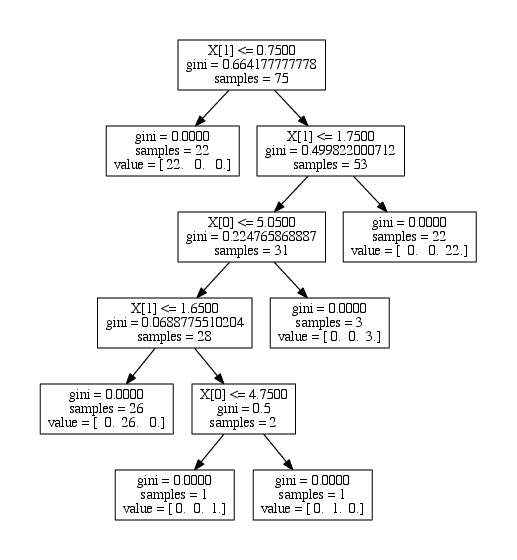

In [23]:
from wand.image import Image as WImage 
img = WImage(filename='iris_50.pdf')
img

###2. Redo the model with a 75% - 25% training/test split and compare the results. Are they better or worse than before? Discuss why this may be.

In [28]:
x_train_75, x_test_25, y_train_75, y_test_25 = cross_validation.train_test_split(x,y,train_size=0.75)

In [29]:
dt_75_25 = tree.DecisionTreeClassifier()

In [30]:
dt_75_25 = dt_75_25.fit(x_train_75,y_train_75)

In [31]:
measure_performance(x_train_75, y_train_75, dt)

Accuracy:0.982 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.97      0.97      0.97        37
          2       0.97      0.97      0.97        38

avg / total       0.98      0.98      0.98       112


Confusion matrix
[[37  0  0]
 [ 0 36  1]
 [ 0  1 37]] 



In [32]:
measure_performance(x_test_25, y_test_25, dt)

Accuracy:0.974 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.92      0.96        13
          2       0.92      1.00      0.96        12

avg / total       0.98      0.97      0.97        38


Confusion matrix
[[13  0  0]
 [ 0 12  1]
 [ 0  0 12]] 



In [34]:
#interestingly, our performance deteriorated on our training set with more examples (100% vs 98.2%), 
#but increased on our test set (97% vs 96%), likely due to more examples

###3. Perform 10-fold cross validation on the data and compare your results to the hold out method we used in 1 and 2. Take the average of the results. What do you notice about the accuracy measures in each of these?

In [1]:
from sklearn import cross_validation

In [5]:
iris = datasets.load_iris() # load iris data set
x = iris.data[:,2:] # the attributes
y = iris.target # the target variable

In [6]:
dt = tree.DecisionTreeClassifier()

In [7]:
dt = dt.fit(x,y) #build the model on all the data and then test with cross-fold validation

In [12]:

cv = cross_validation.KFold(len(x),10,shuffle=True,random_state=0) 

The method above is a more elaborated way of creating the cross-folds. `cross_val_score` is already doing this under the hood. We're just making it explicit

In [14]:
scores = cross_validation.cross_val_score(dt,x,y,cv=cv)

In [15]:
scores.mean()

0.94000000000000006

Based on this result, it's likely our model will achieve a 94% accuracy on unseen data, rather than the 97% predicted with the hold-out method

###4. Open the seeds_dataset.txt and perform basic exploratory analysis. What attributes to we have? What are we trying to predict?
For context of the data, see the documentation here: https://archive.ics.uci.edu/ml/datasets/seeds

In [41]:
df = pd.read_csv("data/seeds_dataset.txt",header=None)

In [42]:
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


In [43]:
df.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [44]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes.AxesSubplot object at 0x10cfaf590>,
        <matplotlib.axes.AxesSubplot object at 0x111693d50>]], dtype=object)

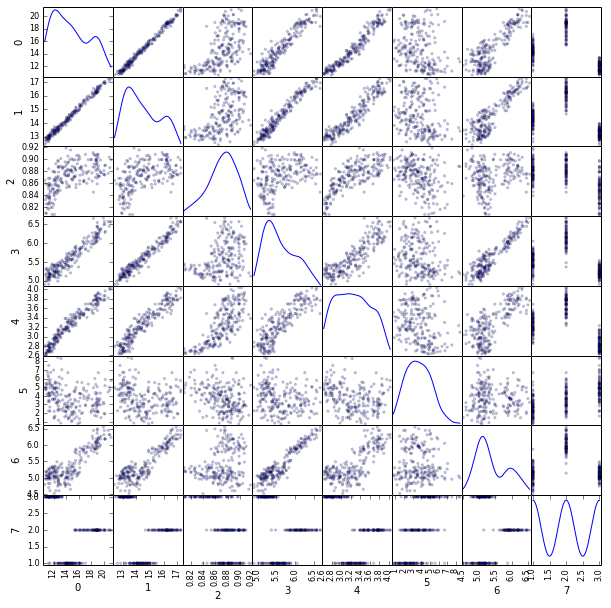

In [45]:
scatter_matrix(df,alpha=0.2, figsize=(10, 10), diagonal='kde')

In [46]:
df.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
1,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
2,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
3,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
4,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
5,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
6,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
7,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


based on the various characteristics of the wheat kernel, we're predicting the variety, either Kama, Rosa and Canadian. Some features seem highly correlated and potentially useful for splitting features (area and perimeter), while others don't appear correlated and unlikely to help split features (asymetry coefficient)

###5. Using the seeds_dataset.txt, create a classifier to predict the type of seed. Perform the above hold out evaluation (50-50, 75-25, 10-fold cross validation) and discuss the results.

In [65]:
x = np.asarray(df[[0,1,2,3,4,5,6]])
y = np.asarray(df[7])

In [48]:
#50-50 split
x_train_50,x_test_50,y_train_50,y_test_50 = cross_validation.train_test_split(x,y,train_size=0.5)

In [49]:
dt_seeds_50 = tree.DecisionTreeClassifier()

In [50]:
dt_seeds_50 = dt_seeds_50.fit(x_train_50,y_train_50)

In [51]:
measure_performance(x_train_50,y_train_50,dt_seeds_50)

Accuracy:1.000 

Classification report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        33
          2       1.00      1.00      1.00        33
          3       1.00      1.00      1.00        39

avg / total       1.00      1.00      1.00       105


Confusion matrix
[[33  0  0]
 [ 0 33  0]
 [ 0  0 39]] 



In [52]:
measure_performance(x_test_50,y_test_50,dt_seeds_50)

Accuracy:0.924 

Classification report
             precision    recall  f1-score   support

          1       0.89      0.89      0.89        37
          2       0.95      0.97      0.96        37
          3       0.93      0.90      0.92        31

avg / total       0.92      0.92      0.92       105


Confusion matrix
[[33  2  2]
 [ 1 36  0]
 [ 3  0 28]] 



class 1 and 3 are hard for the classifier to distinguish, which makes sense looking at the scatter matrix results and seeing the overlap between them

In [53]:
#75-25 split
x_train_75,x_test_25,y_train_75,y_test_25 = cross_validation.train_test_split(x,y,train_size=0.75)

In [54]:
dt_seeds_75 = tree.DecisionTreeClassifier()

In [55]:
dt_seeds_75 = dt_seeds_75.fit(x_train_75,y_train_75)

In [56]:
measure_performance(x_train_75,y_train_75,dt_seeds_75)

Accuracy:1.000 

Classification report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        59
          2       1.00      1.00      1.00        47
          3       1.00      1.00      1.00        51

avg / total       1.00      1.00      1.00       157


Confusion matrix
[[59  0  0]
 [ 0 47  0]
 [ 0  0 51]] 



In [57]:
measure_performance(x_test_25,y_test_25,dt_seeds_75)

Accuracy:0.925 

Classification report
             precision    recall  f1-score   support

          1       0.77      0.91      0.83        11
          2       0.95      0.91      0.93        23
          3       1.00      0.95      0.97        19

avg / total       0.93      0.92      0.93        53


Confusion matrix
[[10  1  0]
 [ 2 21  0]
 [ 1  0 18]] 



Although the precision and recall for class 3 have improved, there's still a problem in having the model distinguish between classes 1 and 3

In [58]:
# 10 fold cross validation
dt_seeds_cv = tree.DecisionTreeClassifier()
dt_seeds_cv = dt_seeds_cv.fit(x,y) #fit the model on all data

In [60]:
scores = cross_validation.cross_val_score(dt_seeds_cv,x,y,cv=10)

In [61]:
scores.mean()

0.92857142857142849

In [66]:
dt_seeds_cv.feature_importances_

array([ 0.34860165,  0.0122449 ,  0.0125    ,  0.00714286,  0.02042607,
        0.06731387,  0.53177066])

The decision tree model for this data is likely fairly accurate, approximately 93% on this data.